# BOSTON HOUSING PRICES REGRESSION

The objective of the dataset is to  predict the median value of owner-occupied homes in \$1000s based on features like crime rate, NOx emissions, number of rooms etc.

##### DATA: http://lib.stat.cmu.edu/datasets/boston
##### DATA DESCRIPTION: https://www.kaggle.com/c/boston-housing

### Reading data from project-space to python stream

In [7]:

from razor.project.blocks.bundle import CsvProjectSpaceReader_PythonStream
from razor.project.blocks.bundle import DataQueueToPandasDf_PythonStream
from razor.project.blocks.bundle import SklearnMLFeeder
from razor.project.blocks.bundle import LinearRegression

csv_project_space_reader__python_stream = CsvProjectSpaceReader_PythonStream(input_file_path="/boston_house_prices.csv",batch_size=100,date_parser="",limit=-1) 


ModuleNotFoundError: No module named 'razor.project.blocks'

### Collecting python stream to a pandas dataframe

In [2]:

data_queue_to_pandas_df__python_stream = DataQueueToPandasDf_PythonStream(input_stream=csv_project_space_reader__python_stream.output_stream,
                                                                          input_schema=csv_project_space_reader__python_stream.output_schema) 
# following are the data types of inputs
# (input_stream -> List[list])
# (input_schema -> json)

### Converting data from pandas dataframe to numpy arrays out_x for independent variable and out_y for output variables

In [3]:

sklearn_mlfeeder = SklearnMLFeeder(x_columns=None,y_column="medv",df=data_queue_to_pandas_df__python_stream.df) 
# following are the data types of inputs
# (x_columns -> Union[list, NoneType])
# (y_column -> string)
# (df -> DataFrame)

### Training a linear regression model

In [4]:

linear_regression = LinearRegression(fit_intercept=True,normalize=False,copy_X=True,operation="fit",attribute="coef_",x_data=sklearn_mlfeeder.out_x,y_data=sklearn_mlfeeder.out_y,
                                     test_x_data=None,test_y_data=None,metric_function=["r2_score","mean_squared_error"],path="test_reg",load=False,save=True) 
# following are the data types of inputs
# (fit_intercept -> boolean)
# (normalize -> boolean)
# (copy_X -> boolean)
# (n_jobs -> json)
# (operation -> string)
# (attribute -> string)
# (x_data -> Any)
# (y_data -> Any)
# (test_x_data -> Any)
# (test_y_data -> Any)
# (metric_function -> array)
# (path -> string)
# (load -> boolean)
# (save -> boolean)
# (params -> json)

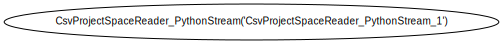

In [5]:
import razor.flow as rf
pipeline = rf.Pipeline(name="Training Boston Regression Model",targets=[csv_project_space_reader__python_stream])
pipeline

### Publishing the Pipeline to the UI Builder

In [6]:

# # To publish a pipeline to UI builder, we just need this like
# import razor
# razor.api.pipelines.save(pipeline,overwrite=True)

In [18]:
pipeline.__dir__()

['name',
 'id',
 'description',
 'targets',
 'logger',
 'graph',
 'graph_style',
 '__inputs__',
 '__outputs__',
 'blocks',
 'execution_queue',
 'block_executors',
 'pipeline_process',
 '_apm_monitor',
 '_runtime_monitor',
 '_state_recorder',
 '_Pipeline__runs_manager_util',
 '__module__',
 '_Pipeline__instance_count',
 '__init__',
 '_Pipeline__build_graph',
 '_Pipeline__add_block_to_graph',
 '_Pipeline__collect_pipeline_io',
 '_Pipeline__create_graph_edge',
 '_Pipeline__does_edge_exist',
 '_Pipeline__check_cyclic_inputs',
 '_Pipeline__check_duplicate_block_names',
 '_Pipeline__root_blocks',
 'get_function_groups',
 'show',
 '_repr_mimebundle_',
 '_terminate_blocks',
 '_event_handler',
 '_log_handler',
 '_log_manager',
 '_execute',
 '__init_subclass__',
 'execute',
 '_repr_meta_',
 '__dict__',
 '__weakref__',
 '__doc__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',

In [4]:
from razor.api import blocks
from razor.api.core import BlockScope

In [5]:
blocks.init_bundle(bundle = "bundle", category = "test")

In [6]:
blocks.publish(bundle="bundle", scope=BlockScope.PROJECT, overwrite=True)


In [20]:
import razor
razor.api.project_space_path('/')

AttributeError: module 'razor.api' has no attribute 'project_space_path'

In [25]:
blocks

In [ ]:
blocks.categories

In [3]:
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)